# Coding Tutorial 12: Audio Tasks and CLIP

```
Course: CSCI 5922 Spring 2025, University of Colorado Boulder
TA: Everley Tseng
Email: Yu-Yun.Tseng@colorado.edu
* AI assistant is used in making this tutorial
```

## Overview

Sections:
- Wav2Vec2 for audio-to-text prediction
- CLIP for image classification

Objectives:
- Learn how to deal with audio data
- Learn how to leverage the transformer-based audio models on Hugging Face
- Learn how to leverage the zero-shot CLIP model to perform applications without fine-tuning

## Audio to Text

Speech recognition, also known as audio-to-text, is the process of converting spoken language into written text. It is a critical task in many real-world applications such as virtual assistants (e.g., Siri, Alexa), transcription services, and voice command systems. Modern speech recognition systems rely on deep learning models to accurately transcribe spoken words, handle different accents, and cope with noisy environments.



For this task, we will download an audio dataset from `torchaudio` and use the audio processing library `librosa` to process the data.

In [ ]:
!pip install torchaudio
!pip install librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 812.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torch
import librosa
from IPython.display import Audio

### Prepare Data

Similar to `torchvision`, [`torchaudio`](https://pytorch.org/audio/2.5.0/datasets.html) has a rich collection of audio datasets. Below, let's use the dataset [`librispeech`](https://pytorch.org/audio/2.5.0/generated/torchaudio.datasets.LIBRISPEECH.html#torchaudio.datasets.LIBRISPEECH) for the audio-to-text task.

To play the audio sound in your notebook, you can use the function `IPython.display.Audio`.

In [ ]:
import torchaudio
from torchaudio.datasets import LIBRISPEECH

# Load a subset of the LibriSpeech dataset
dataset = LIBRISPEECH(root=".", url="test-clean", download=True)

# Check the first sample in the dataset
print(dataset[0])
waveform, sample_rate, transcript, _, _, _ = dataset[0]
print('Sample rate: {}'.format(sample_rate))
print('Transcript: {}'.format(transcript))

# Play audio
Audio(waveform.numpy(), rate=sample_rate)

(tensor([[0.0003, 0.0003, 0.0004,  ..., 0.0021, 0.0021, 0.0016]]), 16000, 'HE HOPED THERE WOULD BE STEW FOR DINNER TURNIPS AND CARROTS AND BRUISED POTATOES AND FAT MUTTON PIECES TO BE LADLED OUT IN THICK PEPPERED FLOUR FATTENED SAUCE', 1089, 134686, 0)
Sample rate: 16000
Transcript: HE HOPED THERE WOULD BE STEW FOR DINNER TURNIPS AND CARROTS AND BRUISED POTATOES AND FAT MUTTON PIECES TO BE LADLED OUT IN THICK PEPPERED FLOUR FATTENED SAUCE


Given the `waveform` and the `sampling_rate`, the processor is able to generate a set of model inputs for your data.

In [ ]:
# Process the audio input to prepare it for the Wav2Vec2 model
inputs = processor(waveform, sampling_rate=sample_rate, return_tensors="pt", padding=True)

### Wav2Vec2 Model

There are various models available on Hugging Face for audio-to-text. We'll be using the [Wav2Vec2 model](https://huggingface.co/facebook/wav2vec2-large-960h), which is a transformer-based model developed by FacebookAI, which set new performance records on benchmarks for speech recognition tasks.

In [ ]:
# Load the pre-trained Wav2Vec2 model and processor
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

### Predict

In [ ]:
# Perform inference to get logits (output predictions from the model)
with torch.no_grad():
    logits = model(input_values=inputs.input_values[0]).logits

# Decode the predicted ids to text
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

print("Transcription: ", transcription[0])

torch.Size([1, 1, 166960])
Transcription:  HE HOPED THERE WOULD BE STEW FOR DINNER TURNIPS AND CARROTS AND BRUISED POTATOES AND FAT MUTTON PIECES TO BE LADLED OUT IN THICK PEPPERED FLOUR FATTENED SAUCE


## CLIP

**CLIP (Contrastive Language-Image Pretraining)** is a model developed by OpenAI that learns to relate images and text by training on a large dataset of image-text pairs. The key idea behind CLIP is to learn a joint embedding space for both images and text such that corresponding image-text pairs are close together in this space, while non-corresponding pairs are far apart. This enables the model to understand both images and text in a unified way.




<img src="https://miro.medium.com/v2/resize:fit:3662/1*tg7akErlMSyCLQxrMtQIYw.png" alt="Illustration of attention mechanism in the paper Attention Is All You Need." width="95%">

*An overview figure of CLIP from "Learning Transferable Visual Models From Natural Language Supervision".*

Pay attention to these components in the model:
- **Image Encoder**: CLIP uses a vision transformer (ViT) or a ResNet as its image encoder. The image is processed into a feature vector that represents the content of the image.
- **Text Encoder**: CLIP uses a Transformer-based model (similar to GPT) as its text encoder. The text is processed into a feature vector that represents the semantic content of the text.
- **Zero-Shot Learning**: One of the key features of CLIP is its zero-shot capability. After pretraining on a large amount of image-text data, CLIP can be used in a zero-shot fashion for tasks like image classification or text-based image retrieval without the need for further task-specific training. It can directly take an image and a textual description (e.g., "cat") and determine whether the description matches the image.



Below, let's use the clip model from Hugging Face to perform zero-shot classification task.

### CLIP Model on Hugging Face

Below, let's follow the [CLIP tutorial](https://huggingface.co/docs/transformers/en/model_doc/clip) on Hugging Face to load the model and make predictions.

There are multiple CLIP configurations available on Hugging Face including [`clip-vit-base-patch16`](https://huggingface.co/openai/clip-vit-base-patch16), [`clip-vit-large-patch32`](https://huggingface.co/openai/clip-vit-base-patch32), and [`clip-vit-large-patch14`](https://huggingface.co/openai/clip-vit-large-patch14). We'll be using the smaller model `clip-vit-base-patch16` for demonstration.

In [ ]:
from transformers import CLIPProcessor, CLIPModel

# Load pre-trained CLIP model and processor
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch16')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch16')

### Process Input

- Text Input: For classification, set up prompts for each class, such as `["a photo of a cat", "a photo of a dog", "a photo of a car"]`.
- Image Input: To test the above classes, we have three urls here to test on. You may add your own images or classes.
- Processor: These prompts will be processed separately with an output prediction score for each prompt. Following the tutorial, use `processor` to process the text and the image input.

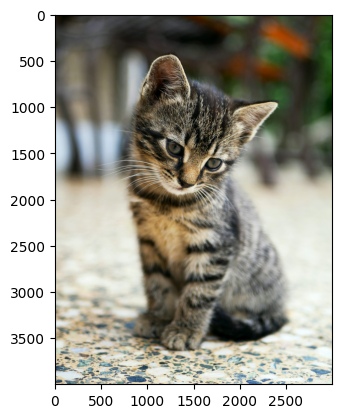

In [ ]:
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Try the follwing images for cat, dog, and car
image_url = 'https://images.unsplash.com/photo-1529778873920-4da4926a72c2?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8Y3V0ZSUyMGNhdHxlbnwwfHwwfHx8MA%3D%3D'
# image_url = 'https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=1xw:0.74975xh;center,top&resize=1200:*'
# image_url = 'https://cdn.sanity.io/images/n5z5pg8m/production/11f87126853cc061e815f5b300d7f7e5c21cf5ea-6016x4016.jpg'

# Load an image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
plt.imshow(image)
plt.show()

# Define the text prompt
text = ['a photo of a cat', 'a photo of a dog', 'a photo of a car']

# Preprocess the image and text inputs
inputs = processor(text=text, images=image, return_tensors='pt', padding=True)


### Predict

Use the model we loaded to make predictions.

In [ ]:
# Get model predictions
with torch.no_grad():
    outputs = model(**inputs)

# Get the similarity between the image and text
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)  # Probabilities for each class

for prompt, prob in zip(text, probs.tolist()[0]):
    print('Prompt: {}, probability: {:.4f}'.format(prompt, prob))

Prompt: a photo of a cat, probability: 0.9978
Prompt: a photo of a dog, probability: 0.0020
Prompt: a photo of a car, probability: 0.0002


## Review

In this tutorial, we explored audio-to-text processing using Wav2Vec2 and learned how to utilize CLIP for zero-shot image-text classification. We worked with torchaudio to process and transcribe audio data, leveraging the Wav2Vec2 model to convert speech to text. The CLIP model understands the relationship between images and text without needing fine-tuning, which highlights the power of zero-shot learning. For practice, you can test CLIP on different images and tasks, and load different audio data/model for experiments. These are all practical tasks in real-world applications!


For any questions and discussions regarding this tutorial, attend [TA office hours](https://docs.google.com/spreadsheets/d/1fzfTJpEF7RaUYRA_NGa3DkiazdQXVj7QNBbp6DrEZ3I/edit?usp=sharing) or create a post on [Piazza](https://piazza.com/colorado/spring2025/csci5922/home) :) See you in the next tutorial!

\- Everley